In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# a. Work Context From O*NET 21.0 Data Dictionary

[O*NET 21.0 Data Dictionary](https://www.onetonline.org/find/descriptor/browse/4.C/4.C.1/4.C.1.a/4.C.1.a.2/4.C.1.d/4.C.1.c/4.C.1.b/4.C.1.b.1/4.C.2/4.C.2.d/4.C.2.d.1/4.C.2.b/4.C.2.b.1/4.C.2.c/4.C.2.c.1/4.C.2.e/4.C.2.e.1/4.C.2.a/4.C.2.a.1/4.C.3/4.C.3.c/4.C.3.a/4.C.3.a.2/4.C.3.d/4.C.3.b)

In [126]:
# Open up the file for the work context
filename = 'Work Context.xlsx'
work_context_df = pd.read_excel(filename)

# Get the SOC Code
work_context_df['SOC'] = work_context_df['O*NET-SOC Code'].apply(lambda x : x[:7])

# Multiply the value by 20 to make the scale from0 to 100
work_context_df['Data Value'] = work_context_df['Data Value'] * 20 

work_context_df.head(2)

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Category,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,SOC
0,11-1011.00,Chief Executives,4.C.1.a.2.c,Public Speaking,CX,Context,NaN,67.8,25.0,0.22,2.93,3.86,N,NaN,07/2014,Incumbent,11-1011
1,11-1011.00,Chief Executives,4.C.1.a.2.c,Public Speaking,CXP,Context (Categories 1-5),1.0,120.4,25.0,5.14,0.97,29.49,N,NaN,07/2014,Incumbent,11-1011


# b. Work Context from the O*NET 24.2 Data Dictionary

[O*NET 24.2 Data Dictionary](https://www.onetcenter.org/dictionary/24.2/excel/work_context.html)

In [ ]:
# Filter for the relevant work contexts and scale (the one from 1 to 5)
relevant_contexts = [
    "Face-to-Face Discussions",
    "Public Speaking",
    "Responsibility for Outcomes and Results",
    "Responsible for Others' Health and Safety",
    "Outdoors, Exposed to Weather",
    "Physical Proximity",
    "Consequence of Error",
    "Freedom to Make Decisions",
    "Frequency of Decision Making",
    "Degree of Automation",
    "Structured versus Unstructured Work"
]

is_relevant = (
    work_context_df['Element Name'].isin(relevant_contexts)
    & (work_context_df['Scale ID'] == 'CX')
)
work_context_df = work_context_df[is_relevant]

# Keep the latest date for each SOC and ability, but preserve first-seen order
work_context_df = (
    work_context_df
    .sort_values(by='Date')
    .drop_duplicates(
        subset=['O*NET-SOC Code', 'Element Name'],
        keep='last'
    )
    .sort_index()
)

In [130]:
work_context_df.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Category,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,SOC
0,11-1011.00,Chief Executives,4.C.1.a.2.c,Public Speaking,CX,Context,NaN,67.8,25.0,0.22,2.93,3.86,N,NaN,07/2014,Incumbent,11-1011
24,11-1011.00,Chief Executives,4.C.1.a.2.l,Face-to-Face Discussions,CX,Context,NaN,99.6,25.0,0.01,4.95,5.00,N,NaN,07/2014,Incumbent,11-1011
54,11-1011.00,Chief Executives,4.C.1.c.1,Responsible for Others' Health and Safety,CX,Context,NaN,76.0,25.0,0.31,3.16,4.43,N,NaN,07/2014,Incumbent,11-1011
60,11-1011.00,Chief Executives,4.C.1.c.2,Responsibility for Outcomes and Results,CX,Context,NaN,89.0,25.0,0.18,4.08,4.82,N,NaN,07/2014,Incumbent,11-1011
96,11-1011.00,Chief Executives,4.C.2.a.1.c,"Outdoors, Exposed to Weather",CX,Context,NaN,44.2,25.0,0.32,1.54,2.87,N,NaN,07/2014,Incumbent,11-1011


# c. Job Zones

In [136]:
work_context_df[work_context_df['SOC'] == '27-1011']

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Category,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,SOC
101522,27-1011.00,Art Directors,4.C.1.a.2.c,Public Speaking,CX,Context,NaN,36.0,25.0,0.21,1.37,2.24,N,NaN,07/2012,Incumbent,27-1011
101546,27-1011.00,Art Directors,4.C.1.a.2.l,Face-to-Face Discussions,CX,Context,NaN,98.8,25.0,0.06,4.82,5.00,N,NaN,07/2012,Incumbent,27-1011
101576,27-1011.00,Art Directors,4.C.1.c.1,Responsible for Others' Health and Safety,CX,Context,NaN,48.4,27.0,0.19,2.03,2.80,N,NaN,07/2012,Incumbent,27-1011
101582,27-1011.00,Art Directors,4.C.1.c.2,Responsibility for Outcomes and Results,CX,Context,NaN,79.6,27.0,0.31,3.35,4.61,N,NaN,07/2012,Incumbent,27-1011
101618,27-1011.00,Art Directors,4.C.2.a.1.c,"Outdoors, Exposed to Weather",CX,Context,NaN,34.6,27.0,0.12,1.48,1.98,N,NaN,07/2012,Incumbent,27-1011
101642,27-1011.00,Art Directors,4.C.2.a.3,Physical Proximity,CX,Context,NaN,66.8,27.0,0.34,2.64,4.04,N,NaN,07/2012,Incumbent,27-1011
101786,27-1011.00,Art Directors,4.C.3.a.1,Consequence of Error,CX,Context,NaN,59.0,27.0,0.45,2.01,3.88,N,NaN,07/2012,Incumbent,27-1011
101798,27-1011.00,Art Directors,4.C.3.a.2.b,Frequency of Decision Making,CX,Context,NaN,84.4,27.0,0.31,3.58,4.86,N,NaN,07/2012,Incumbent,27-1011
101804,27-1011.00,Art Directors,4.C.3.a.4,Freedom to Make Decisions,CX,Context,NaN,85.6,27.0,0.22,3.83,4.73,N,NaN,07/2012,Incumbent,27-1011
101810,27-1011.00,Art Directors,4.C.3.b.2,Degree of Automation,CX,Context,NaN,42.6,26.0,0.40,1.30,2.96,N,NaN,07/2012,Incumbent,27-1011


# c. Combining Work Contexts and Job Zones

In [ ]:
work_context_df['base_code'] = work_context_df['O*NET-SOC Code'].str[:7]

# For each base code and then for each work context, get the average
code_contexts_df = (
    work_context_df.groupby(['base_code', 'Element Name'], as_index=False)['Data Value']
        .mean()
)

In [113]:
# For each base code, get the average of the different values
code_auto_df = code_contexts_df.groupby(['base_code'])['Data Value'].mean()
code_comple_df = 1 / code_auto_df
soc_c = dict(zip(code_comple_df.index, code_comple_df.values))

In [114]:
filename = '../2_soc_aioe/soc_aioe.csv'
relevant_cols = [0, 1, 2, 3, 4, 5, 8, 9, 10]
mca_df = pd.read_csv(filename, usecols=relevant_cols)

In [115]:
mca_df['Complementarity'] = mca_df['SOC'].apply(lambda x : soc_c.get(x.strip(), np.nan))

In [116]:
mca_df['Complementarity'] = mca_df['Complementarity'].fillna(
    mca_df.groupby('major_minor')['Complementarity'].transform('median')
)

In [118]:
mca_df.sort_values(by='Complementarity', ascending=False)

,Job Title,Job Sector,Job Subsector,Educational Pathway,HEI with PRC (Professional Regulation Commission) Exam,Some HEI,SOC,AIOE,major_minor,Complementarity
46,Apparel Pattern Designer,Manufacturing ...,"Manufacture of wearing apparel, except fur app...",Higher Education,No,No,51-9031,0.403718,51,0.422914
377,Fabric Quality Controller,Manufacturing ...,Manufacture of other textiles,Higher Education,No,No,51-9031,0.403718,51,0.422914
1128,Worship Musician,"Arts, Entertainment and Recreation","Creative, arts and entertainment activities",Higher Education,No,No,27-2042,0.617908,27,0.403670
966,Session Guitarist,"Arts, Entertainment and Recreation","Creative, arts and entertainment activities",Higher Education,No,No,27-2042,0.617908,27,0.403670
745,Music Arranger Assistant,"Arts, Entertainment and Recreation","Creative, arts and entertainment activities",Higher Education,No,Yes,27-2042,0.617908,27,0.403670
...,...,...,...,...,...,...,...,...,...,...
5,4-Wheel Tractor Mechanic,"Agriculture, Forestry, and Fishing",Support activities to agriculture and post-har...,Not Higher Education,No,No,49-9081,0.381996,49,0.247302
666,Maintenance Fitter,Manufacturing ...,"Other manufacturing, n.e.c.",Higher Education,No,No,49-9081,0.381996,49,0.247302
107,Boat Fitter,Manufacturing ...,Building of ships and boats,Not Higher Education,No,No,49-9081,0.381996,49,0.247302
385,Farm Equipment Fabricator,Manufacturing ...,"Manufacture of structural metal products, tank...",Not Higher Education,No,No,49-9081,0.381996,49,0.247302


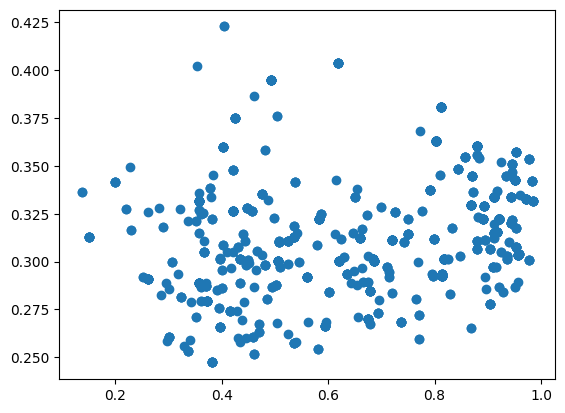

In [119]:
plt.scatter(mca_df['AIOE'], mca_df['Complementarity'])

<Axes: >

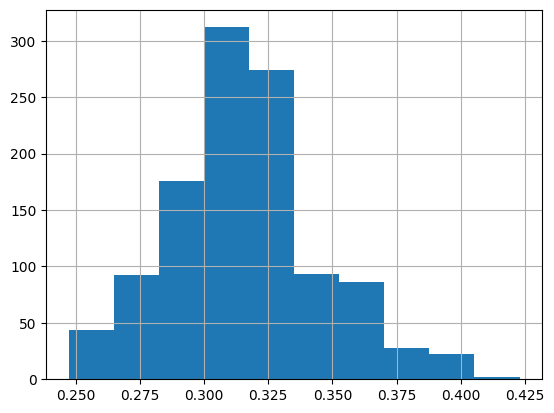

In [121]:
mca_df['Complementarity'].hist()